# Importing important libraries

In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from OOP import dataset


# Using my OOP methods for EDA

In [617]:
Titanic = dataset()
# creating instance of a dataset class

In [618]:
df = Titanic.open_dataset(func=lambda :sns.load_dataset('Titanic'))
# loading dataset 

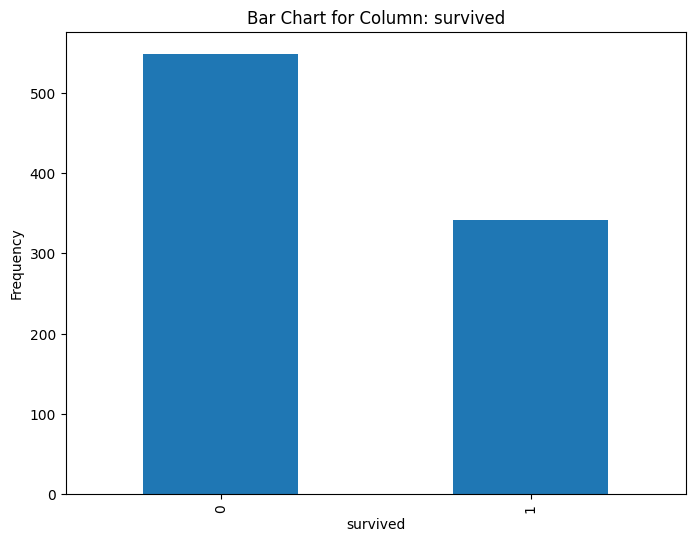

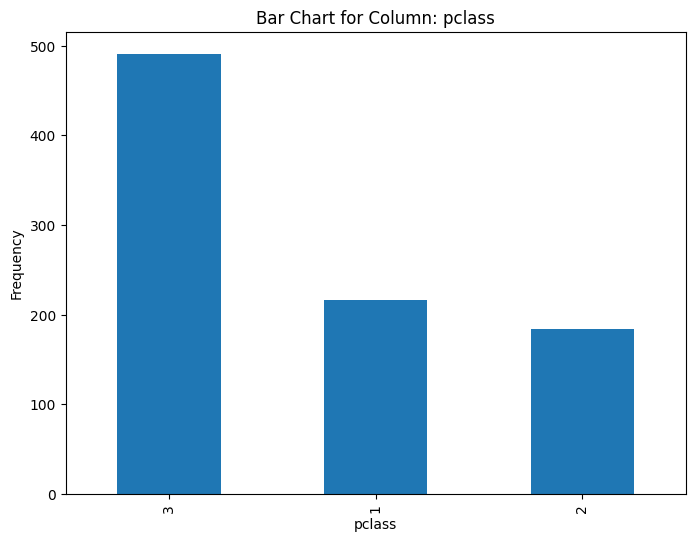

In [619]:
Titanic.bar_chart(df)
# by looping creating histogram for particular columns

# Checking important information about dataset 

In [620]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [621]:
print(df.info())    
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000

In [622]:
df.shape

(891, 15)

In [623]:
df = df[df.columns[::-1]]


In [624]:
df.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [625]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer


Encode = OneHotEncoder()
Biner = LabelBinarizer()

for i in ['alone','alive','who','adult_male','sex']:
    df[i] = Biner.fit_transform(df[i])


In [626]:
classess_of_people = df['class'].unique().tolist()

In [627]:
classes_of_people_dict =  {item: index for index, item in enumerate(classess_of_people)}

In [628]:
classes_of_people_dict

{'Third': 0, 'First': 1, 'Second': 2}

In [629]:
df['class'] = df['class'].replace(classes_of_people_dict)

C:\Users\User\AppData\Local\Temp\ipykernel_3324\574277246.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(classes_of_people_dict)


In [630]:
df.head(1)

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,0,0,Southampton,NaN,1,0,0,S,7.25,0,1,22.0,1,3,0


In [631]:
df.isna().sum()

alone            0
alive            0
embark_town      2
deck           688
adult_male       0
who              0
class            0
embarked         2
fare             0
parch            0
sibsp            0
age            177
sex              0
pclass           0
survived         0
dtype: int64

In [632]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].value_counts().index[0])

In [633]:
df['embark_town'].isnull().sum()

np.int64(0)

In [634]:
df['age'] = df['age'].interpolate(method='linear')

In [635]:

df['embarked'] = df['embarked'].fillna(df['embarked'].value_counts().index[0])

In [636]:
df.isna().sum()

alone            0
alive            0
embark_town      0
deck           688
adult_male       0
who              0
class            0
embarked         0
fare             0
parch            0
sibsp            0
age              0
sex              0
pclass           0
survived         0
dtype: int64

In [637]:
indexes = df['deck'].value_counts().index.tolist()


In [638]:
values = df['deck'].value_counts().tolist()

In [639]:
parametrized_values = []
for i in values:
    parametrized_values.append(i/100)
parametrized_values = np.asarray(parametrized_values)

In [640]:
total = np.asarray(parametrized_values).sum()
total

np.float64(2.0300000000000002)

In [641]:
probabilities = [num/total for num in parametrized_values]
print(np.sum(probabilities))

1.0


In [642]:
import random 

random.choices(population=indexes,weights=probabilities)

['B']

In [643]:
df['deck'] = df['deck'].apply(
    lambda x: random.choices(indexes, probabilities)[0] if callable(x) or pd.isnull(x) else x
)

In [644]:
df.isna().sum()

alone          0
alive          0
embark_town    0
deck           0
adult_male     0
who            0
class          0
embarked       0
fare           0
parch          0
sibsp          0
age            0
sex            0
pclass         0
survived       0
dtype: int64

In [645]:
df['deck'].value_counts()

deck
C    260
B    190
D    135
E    131
A     83
F     70
G     22
Name: count, dtype: int64

In [646]:
df.head(1)

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,0,0,Southampton,B,1,0,0,S,7.25,0,1,22.0,1,3,0


In [647]:
Alphabetical = pd.unique(df['deck'].values).tolist()


In [648]:
Alphabetical = sorted(Alphabetical)

Alphabetical = {index: value for value, index in enumerate(Alphabetical)}

In [649]:
Alphabetical

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [650]:
df['deck'] = df['deck'].replace(Alphabetical)

C:\Users\User\AppData\Local\Temp\ipykernel_3324\4082650084.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['deck'] = df['deck'].replace(Alphabetical)


In [651]:
df.columns

Index(['alone', 'alive', 'embark_town', 'deck', 'adult_male', 'who', 'class',
       'embarked', 'fare', 'parch', 'sibsp', 'age', 'sex', 'pclass',
       'survived'],
      dtype='object')

In [652]:
df['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [653]:
df_towns = pd.get_dummies(df['embark_town'],dtype=int)

In [654]:
df = pd.concat([df,df_towns],axis=1)
df.columns
df = df.drop(columns=['embark_town', 'Cherbourg'])

In [655]:
df_embarked = pd.get_dummies(df['embarked'],dtype=int)

In [656]:
df = pd.concat([df,df_embarked],axis=1)

In [657]:
df = df.drop(columns=['C','embarked'])

In [658]:
df.head(5)

,alone,alive,deck,adult_male,who,class,fare,parch,sibsp,age,sex,pclass,survived,Queenstown,Southampton,Q,S
0,0,0,1,1,0,0,7.2500,0,1,22.0,1,3,0,0,1,0,1
1,0,1,2,0,0,1,71.2833,0,1,38.0,0,1,1,0,0,0,0
2,1,1,4,0,0,0,7.9250,0,0,26.0,0,3,1,0,1,0,1
3,0,1,2,0,0,1,53.1000,0,1,35.0,0,1,1,0,1,0,1
4,1,0,0,1,0,0,8.0500,0,0,35.0,1,3,0,0,1,0,1


In [676]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Separate target and features
Y = df[['survived']]
X = df.drop(columns=['survived','alive','Q','S','adult_male'])

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Stand = StandardScaler()

X_train = Stand.fit_transform(X_train)
X_test = Stand.fit_transform(X_test)


# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, Y_train)

# Predict the target labels using the model on the test set
predictions = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.8395522388059702


c:\Users\User\Desktop\Titanic\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [677]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[146  11]
 [ 32  79]]


In [661]:
X

,alone,deck,who,class,fare,parch,sibsp,age,sex,pclass,Queenstown,Southampton
0,0,1,0,0,7.2500,0,1,22.0,1,3,0,1
1,0,2,0,1,71.2833,0,1,38.0,0,1,0,0
2,1,4,0,0,7.9250,0,0,26.0,0,3,0,1
3,0,2,0,1,53.1000,0,1,35.0,0,1,0,1
4,1,0,0,0,8.0500,0,0,35.0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,5,0,2,13.0000,0,0,27.0,1,2,0,1
887,1,1,0,1,30.0000,0,0,19.0,0,1,0,1
888,0,2,0,0,23.4500,2,1,22.5,0,3,0,1
889,1,2,0,1,30.0000,0,0,26.0,1,1,0,0


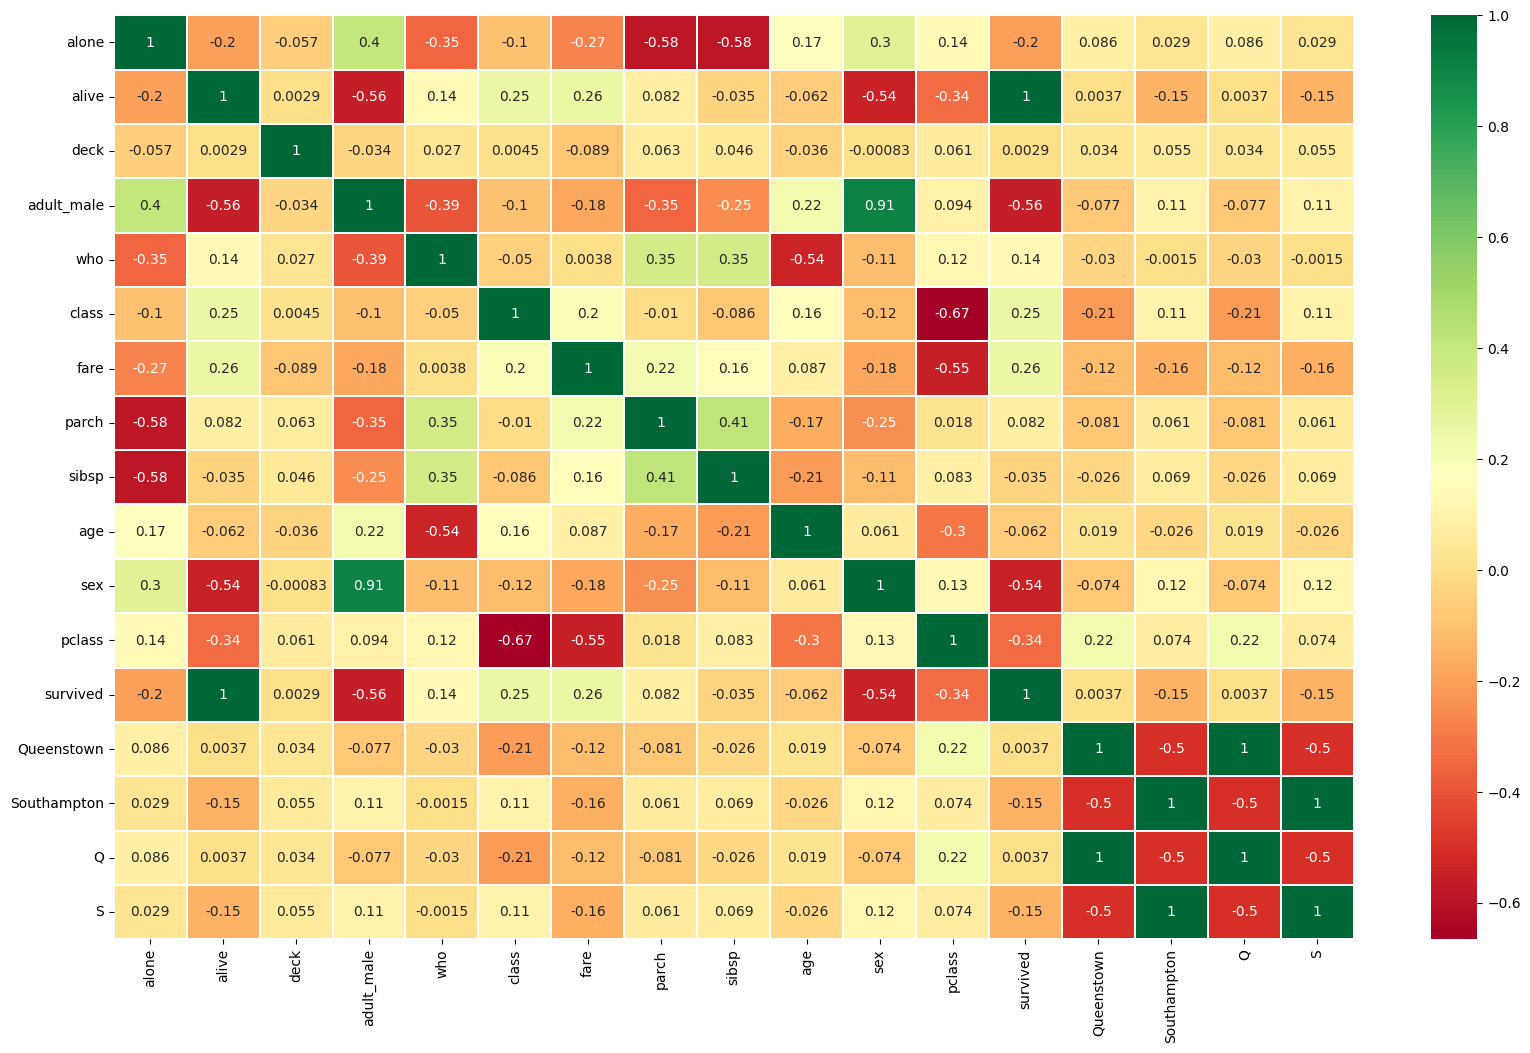

In [664]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()